In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)


## Demo: San Francisco bike share data ##

In [2]:
trip = Table.read_table('trip.csv')
trip.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


## Distribution of Durations ##

/opt/homebrew/lib/python3.11/site-packages/datascience/tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


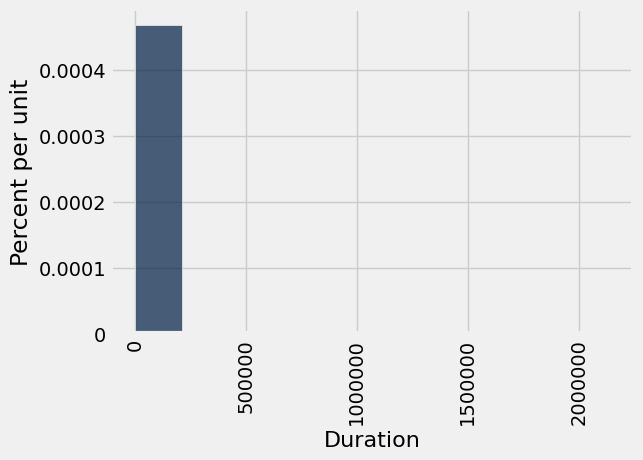

In [3]:
trip.hist('Duration')

# DISCUSSION: This gives a weird histogram. BEFORE moving forward: what do you think is going on, and what could you do to fix it?

In [4]:
trip.sort('Duration', descending=True)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451
745640,611240,4/29/2015 9:41,University and Emerson,35,5/6/2015 11:28,San Antonio Shopping Center,31,196,Customer,81
635263,602338,2/8/2015 3:09,San Jose Civic Center,3,2/15/2015 2:28,San Jose Civic Center,3,9,Customer,89451
779645,594550,5/24/2015 13:33,San Pedro Square,6,5/31/2015 10:42,San Pedro Square,6,39,Customer,95118
812544,552697,6/18/2015 10:45,Mountain View Caltrain Station,28,6/24/2015 20:17,Palo Alto Caltrain Station,34,70,Customer,90024
661326,531240,2/27/2015 15:45,San Jose Diridon Caltrain Station,2,3/5/2015 19:19,SJSU 4th at San Carlos,12,662,Customer,95112


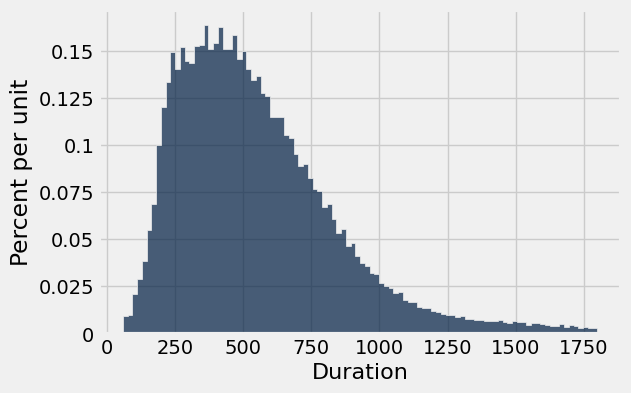

In [5]:
commute = trip.where('Duration', are.below(1800))
commute.hist('Duration', bins = 100)

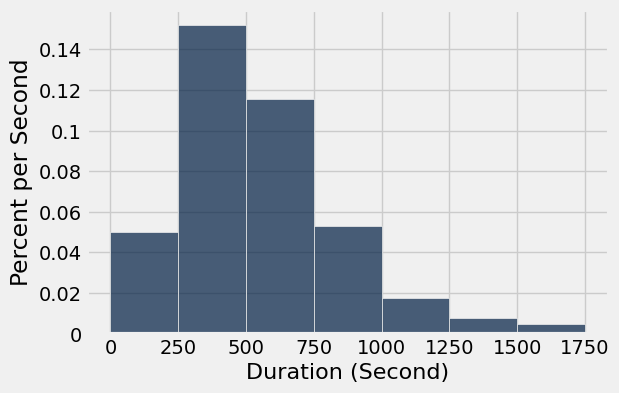

In [6]:
commute.hist('Duration', bins=np.arange(0, 1800, 250), unit='Second')

In [7]:
# Approx percent of people who have 
# a ride duration between 250 and 500 seconds
# "between" = [250, 500) 

(500-250) * 0.15 

37.5

In [8]:
commute.where('Duration', are.between(250, 500)).num_rows

88136

In [9]:
commute.num_rows

232221

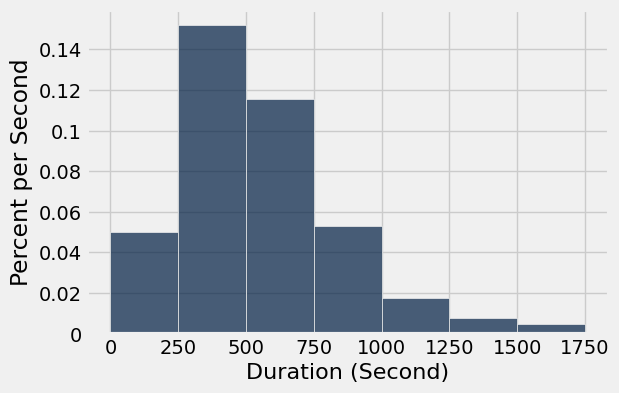

In [10]:
commute.hist('Duration', bins=np.arange(0, 1800, 250), unit='Second')

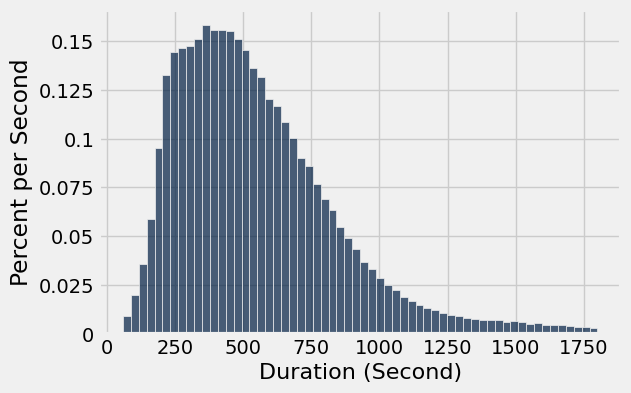

In [11]:
commute.hist('Duration', bins=60, unit='Second')

## Start and End Stations ##

In [12]:
# Most common start station

starts = commute.group('Start Station').sort('count', descending=True)
starts.show()

Start Station,count
San Francisco Caltrain (Townsend at 4th),17206
San Francisco Caltrain 2 (330 Townsend),15068
Harry Bridges Plaza (Ferry Building),11056
Temporary Transbay Terminal (Howard at Beale),9909
Townsend at 7th,9573
Steuart at Market,9386
2nd at Townsend,9202
Embarcadero at Sansome,9149
Market at 10th,7742
Market at Sansome,7341


In [13]:
# Numbers of trips between stations

commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,35,125,394,81,0,0,27,7,0,0,29,45,40,0,8,23,26,30,10,0,0,4,14,369,41,0,0,128,84,179,26,0,0,0,0,0,0,38,45,46,0,0,0,0,0,0,0,0,0,473,285,18,0,0,0,0,0,0,0,0,31,37,0,0,29,205,297,0,6,20
2nd at South Park,145,89,38,137,0,0,134,53,0,0,43,52,109,0,19,30,131,63,72,0,0,34,41,424,336,0,0,46,100,976,70,0,0,0,0,0,0,194,42,74,0,0,0,0,0,0,0,0,0,365,220,29,0,0,0,0,0,0,0,0,49,83,0,0,264,213,91,0,52,108
2nd at Townsend,344,103,119,57,0,0,420,234,0,0,56,207,100,0,254,273,436,299,204,0,0,16,208,1809,182,0,0,81,165,566,127,0,0,0,0,0,0,83,55,97,0,0,0,0,0,0,0,0,0,601,205,13,0,0,0,0,0,0,0,0,31,319,0,0,1680,486,315,0,47,96
5th at Howard,78,122,58,56,0,0,41,101,0,0,160,46,70,0,27,47,31,115,39,0,0,64,48,283,351,0,0,245,126,121,53,0,0,0,0,0,0,77,129,111,0,0,0,0,0,0,0,0,0,432,1239,41,0,0,0,0,0,0,0,0,65,56,0,0,142,557,133,0,28,216
Adobe on Almaden,0,0,0,0,9,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,2,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,4,6,12,0,0,0,0,0,13,13,174,0,18,4,3,4,0,0,11,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,4,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,20,2,4,0,0,0,0,0,4,17,6,0,32,9,16,152,0,0,5,0,0,0,0,0,0,0
Beale at Market,71,50,113,45,0,0,34,460,0,0,159,57,63,0,167,114,27,397,107,0,0,43,283,42,46,0,0,181,123,109,17,0,0,0,0,0,0,27,161,132,0,0,0,0,0,0,0,0,0,421,190,15,0,0,0,0,0,0,0,0,164,55,0,0,10,107,15,0,43,21
Broadway St at Battery St,38,57,186,97,0,0,744,87,0,0,45,225,186,0,129,167,45,189,28,0,0,3,53,116,32,0,0,23,65,240,158,0,0,0,0,0,0,106,48,149,0,0,0,0,0,0,0,0,0,431,292,5,0,0,0,0,0,0,0,0,11,72,0,0,229,502,30,0,45,28
California Ave Caltrain Station,0,0,0,0,0,0,0,0,30,1,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,120,28,0,0,0,0,0,0,0,6,0,0,0,8,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,630,24,0,0,0,0,0,0,0,0,0,6,0,0,0,3,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Average durations of trips between stations

#commute.pivot('Start Station', 'End Station', values='Duration', collect=np.average)
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,35,125,394,81,0,0,27,7,0,0,29,45,40,0,8,23,26,30,10,0,0,4,14,369,41,0,0,128,84,179,26,0,0,0,0,0,0,38,45,46,0,0,0,0,0,0,0,0,0,473,285,18,0,0,0,0,0,0,0,0,31,37,0,0,29,205,297,0,6,20
2nd at South Park,145,89,38,137,0,0,134,53,0,0,43,52,109,0,19,30,131,63,72,0,0,34,41,424,336,0,0,46,100,976,70,0,0,0,0,0,0,194,42,74,0,0,0,0,0,0,0,0,0,365,220,29,0,0,0,0,0,0,0,0,49,83,0,0,264,213,91,0,52,108
2nd at Townsend,344,103,119,57,0,0,420,234,0,0,56,207,100,0,254,273,436,299,204,0,0,16,208,1809,182,0,0,81,165,566,127,0,0,0,0,0,0,83,55,97,0,0,0,0,0,0,0,0,0,601,205,13,0,0,0,0,0,0,0,0,31,319,0,0,1680,486,315,0,47,96
5th at Howard,78,122,58,56,0,0,41,101,0,0,160,46,70,0,27,47,31,115,39,0,0,64,48,283,351,0,0,245,126,121,53,0,0,0,0,0,0,77,129,111,0,0,0,0,0,0,0,0,0,432,1239,41,0,0,0,0,0,0,0,0,65,56,0,0,142,557,133,0,28,216
Adobe on Almaden,0,0,0,0,9,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,2,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,4,6,12,0,0,0,0,0,13,13,174,0,18,4,3,4,0,0,11,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,4,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,20,2,4,0,0,0,0,0,4,17,6,0,32,9,16,152,0,0,5,0,0,0,0,0,0,0
Beale at Market,71,50,113,45,0,0,34,460,0,0,159,57,63,0,167,114,27,397,107,0,0,43,283,42,46,0,0,181,123,109,17,0,0,0,0,0,0,27,161,132,0,0,0,0,0,0,0,0,0,421,190,15,0,0,0,0,0,0,0,0,164,55,0,0,10,107,15,0,43,21
Broadway St at Battery St,38,57,186,97,0,0,744,87,0,0,45,225,186,0,129,167,45,189,28,0,0,3,53,116,32,0,0,23,65,240,158,0,0,0,0,0,0,106,48,149,0,0,0,0,0,0,0,0,0,431,292,5,0,0,0,0,0,0,0,0,11,72,0,0,229,502,30,0,45,28
California Ave Caltrain Station,0,0,0,0,0,0,0,0,30,1,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,120,28,0,0,0,0,0,0,0,6,0,0,0,8,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,630,24,0,0,0,0,0,0,0,0,0,6,0,0,0,3,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Fastest Trips between Stations ##

How can we find the fastest trip ever between each pair of stations?

In [15]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [16]:
shortest = duration.group(['Start Station', 'End Station'], min)
shortest.show(5)

Start Station,End Station,Duration min
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219


## Discussion question

Find the 5 stations closest to Civic Center BART by minimum trip time.

In [31]:
# Write some code to solve this question!

## Maps ##

In [18]:
# Geographical data on the stations
stations = Table.read_table('station.csv').drop(4, 6)
stations.show()

station_id,name,lat,long,landmark
2,San Jose Diridon Caltrain Station,37.3297,-121.902,San Jose
3,San Jose Civic Center,37.3307,-121.889,San Jose
4,Santa Clara at Almaden,37.334,-121.895,San Jose
5,Adobe on Almaden,37.3314,-121.893,San Jose
6,San Pedro Square,37.3367,-121.894,San Jose
7,Paseo de San Antonio,37.3338,-121.887,San Jose
8,San Salvador at 1st,37.3302,-121.886,San Jose
9,Japantown,37.3487,-121.895,San Jose
10,San Jose City Hall,37.3374,-121.887,San Jose
11,MLK Library,37.3359,-121.886,San Jose


In [19]:
sf_stations = stations.where('landmark', are.equal_to('San Francisco'))
sf_stations_map_data = (sf_stations
 .select('lat', 'long', 'name')
 .relabeled('name', 'labels'))
sf_stations_map_data.show(3)

lat,long,labels
37.795,-122.4,Clay at Battery
37.7973,-122.398,Davis at Jackson
37.7942,-122.403,Commercial at Montgomery


In [20]:
Marker.map_table(sf_stations_map_data)

In [21]:
Circle.map_table(sf_stations_map_data)

### Discussion question

Map all stations within 4 minutes (minimum ride time) of Civic Center.

In [22]:
from_cc.show(3)

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),61
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,124


In [23]:
sf_stations_map_data.show(3)

lat,long,labels
37.795,-122.4,Clay at Battery
37.7973,-122.398,Davis at Jackson
37.7942,-122.403,Commercial at Montgomery


In [24]:
close_cc = from_cc.where('Duration min', are.below(4 * 60))
close_markers = (sf_stations_map_data
      .join('labels', close_cc, 'End Station')
      .select('lat', 'long', 'labels'))
Marker.map_table(close_markers)

Choose marker colors by the minimum time from Civic Center

In [25]:
minutes = np.round(from_cc.column("Duration min") / 60)
print(min(minutes), max(minutes))

1.0 14.0


In [26]:
colors = Table().with_columns(
    "minutes", np.arange(15),
    "colors",  ["darkblue", "blue", "lightblue", 
                "darkgreen", "green", "lightgreen",
                "orange", "darkred", "red",
                "gray", "gray", "gray", 
                "gray", "gray", "gray"])
colors_cc = (from_cc
 .with_column("Minutes", minutes)
 .join("Minutes", colors, "minutes"))

colored_markers = (sf_stations_map_data
      .join('labels', colors_cc, 'End Station')
      .select('lat', 'long', 'labels', 'colors'))
Marker.map_table(colored_markers)

In [27]:
station_starts = stations.join('name', starts, 'Start Station')
station_starts.show(3)

name,station_id,lat,long,landmark,count
2nd at Folsom,62,37.7853,-122.396,San Francisco,5293
2nd at South Park,64,37.7823,-122.393,San Francisco,5948
2nd at Townsend,61,37.7805,-122.39,San Francisco,9202


In [28]:
sf_starts = station_starts.relabeled(
    'name', 'labels').where('landmark', 'San Francisco')

In [29]:
sf_starts_map_data = sf_starts.select('lat', 'long', 'labels').with_columns(
    'colors', 'blue',
    'areas', sf_starts.column('count') / 10
)
sf_starts_map_data.show(3)

lat,long,labels,colors,areas
37.7853,-122.396,2nd at Folsom,blue,529.3
37.7823,-122.393,2nd at South Park,blue,594.8
37.7805,-122.39,2nd at Townsend,blue,920.2


In [30]:
Circle.map_table(sf_starts_map_data)